<a href="https://colab.research.google.com/github/irvansikajudin/Data-Science/blob/main/Data_Cleaning_with_WA_Fn_UseC__Telco_Customer_Churn_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [ ]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Soal

### Categorical Data Encoding

pada kolom PaymentMethod, InternetService, OnlineSecurity, Contract <br><br>

lakukan Categorical Data Encoding, dari 4 kolom tersebut wajib 1 kolom menggunakan frequency encoding, 1 kolom mean encoding, dan sisa nya bebas.<br><br>

kemudia setelah dilakukan proses Categorical Data Encoding, gabungkan dengan data awal

In [ ]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [ ]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

### Outlier Handling

In [ ]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Bagaimana handling outlier pada kolom total_bill??

## Jawaban

### One Hot Encoding

In [ ]:
dummies_OnlineSecurity = pd.get_dummies(data['OnlineSecurity'],prefix='OnlineSecurity')
dummies_OnlineSecurity.head()

,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [ ]:
data = pd.concat([data, dummies_OnlineSecurity], axis=1)
data[['OnlineSecurity','OnlineSecurity_No','OnlineSecurity_No internet service','OnlineSecurity_Yes']].head()

,OnlineSecurity,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,No,1,0,0
1,Yes,0,0,1
2,Yes,0,0,1
3,Yes,0,0,1
4,No,1,0,0


### Ordinal Encoding

In [ ]:
# untuk mengecek value apa saja yang ada di kolom Contract
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
mapContract = {'Month-to-month':0, 
               'One year':1,
               'Two year':2}
data['ContractCat'] = data['Contract'].map(mapContract)
data[['Contract', 'ContractCat']].head()


,Contract,ContractCat
0,Month-to-month,0
1,One year,1
2,Month-to-month,0
3,One year,1
4,Month-to-month,0


In [ ]:
data[['Contract', 'ContractCat']]

,Contract,ContractCat
0,Month-to-month,0
1,One year,1
2,Month-to-month,0
3,One year,1
4,Month-to-month,0
...,...,...
7038,One year,1
7039,One year,1
7040,Month-to-month,0
7041,Month-to-month,0


### Frequency Encoding

In [ ]:
freq_et = data['PaymentMethod'].value_counts().reset_index()
freq_et.rename(columns={"index": "PaymentMethod", "PaymentMethod": "freq_PaymentMethod"}, inplace = True)
freq_et['pct_PaymentMethod'] = round((freq_et['freq_PaymentMethod']/freq_et['freq_PaymentMethod'].sum())*100,2)
freq_et

,PaymentMethod,freq_PaymentMethod,pct_PaymentMethod
0,Electronic check,2365,33.58
1,Mailed check,1612,22.89
2,Bank transfer (automatic),1544,21.92
3,Credit card (automatic),1522,21.61


In [ ]:
data = data.merge(freq_et[['PaymentMethod','pct_PaymentMethod']], on='PaymentMethod', how='inner')
data[['PaymentMethod','pct_PaymentMethod']]

,PaymentMethod,pct_PaymentMethod
0,Electronic check,33.58
1,Electronic check,33.58
2,Electronic check,33.58
3,Electronic check,33.58
4,Electronic check,33.58
...,...,...
7038,Credit card (automatic),21.61
7039,Credit card (automatic),21.61
7040,Credit card (automatic),21.61
7041,Credit card (automatic),21.61


### Mean Encoding

In [ ]:
# Hitung Kemunculan Kategori pada dataset
freq_et= data['InternetService'].value_counts().reset_index()
freq_et.rename(columns={"index": "InternetService", "InternetService": "freq_InternetService"}, inplace = True)
freq_et

,InternetService,freq_InternetService
0,Fiber optic,3096
1,DSL,2421
2,No,1526


#### Ordinal Encoding

walaupun berdasarkan materi dikelas untuk gender menggunakan label encoding,
saya tetap memilih ordinal encoding karna codenya lebih sederhana, karena tujuannya hanya menentukan nilai 0 dan 1,
tolong dikoreksi jika pemahaman saya salah ya mentor .. :)

In [ ]:
mapGender = {'Female':0, 
               'Male':1}
data['genderCat'] = data['gender'].map(mapGender)
data[['gender', 'genderCat']].head()

,gender,genderCat
0,Female,0
1,Female,0
2,Female,0
3,Female,0
4,Male,1


#### Label Encoding / penentuan nilai terhadap gender menggunakan label encoding

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['gender'])
data['gender_label_encoding'] = le.transform(data['gender']) 

In [ ]:
Embarked_Label_Encoding = data[['gender','gender_label_encoding',]]
Embarked_Label_Encoding.head()

,gender,gender_label_encoding
0,Female,0
1,Female,0
2,Female,0
3,Female,0
4,Male,1


In [ ]:
#Jumlahkan value target(genderCat) berdasarkan category

sum_et = data.groupby(['InternetService']).agg({'genderCat':sum}).reset_index()
sum_et.rename(columns={"genderCat": "sum_InternetService"}, inplace = True)
sum_et

,InternetService,sum_InternetService
0,DSL,1233
1,Fiber optic,1543
2,No,779


In [ ]:
# Hitung mean encoding untuk InternetService

mean_ec = freq_et.merge(sum_et, on='InternetService', how='inner')
mean_ec['mean_ec_InternetService'] = round((mean_ec['sum_InternetService']/mean_ec['freq_InternetService']),2)
mean_ec

,InternetService,freq_InternetService,sum_InternetService,mean_ec_InternetService
0,Fiber optic,3096,1543,0.50
1,DSL,2421,1233,0.51
2,No,1526,779,0.51


In [ ]:
data = data.merge(mean_ec[['InternetService','mean_ec_InternetService']], on='InternetService', how='inner')
data[['InternetService','mean_ec_InternetService']]

,InternetService,mean_ec_InternetService
0,DSL,0.51
1,DSL,0.51
2,DSL,0.51
3,DSL,0.51
4,DSL,0.51
...,...,...
7038,No,0.51
7039,No,0.51
7040,No,0.51
7041,No,0.51


### Outlier Handling

#### Handling Outlier Menggunakan Z-score

In [ ]:
#Bagaimana handling outlier pada kolom total_bill??
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
from scipy import stats

In [ ]:
print('Jumlah baris sebelum handling outlier pada kolom Fare:', len(data))
data['total_bill zscore'] = abs(stats.zscore(data['total_bill']))
data = data[data['total_bill zscore'] < 3]
print(f'Jumlah baris setelah memfilter outlier:', len(data))
data.head()

Jumlah baris sebelum handling outlier pada kolom Fare: 244
Jumlah baris setelah memfilter outlier: 240


,total_bill,tip,sex,smoker,day,time,size,total_bill zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [ ]:
((244 - 240)/244)*100

1.639344262295082

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

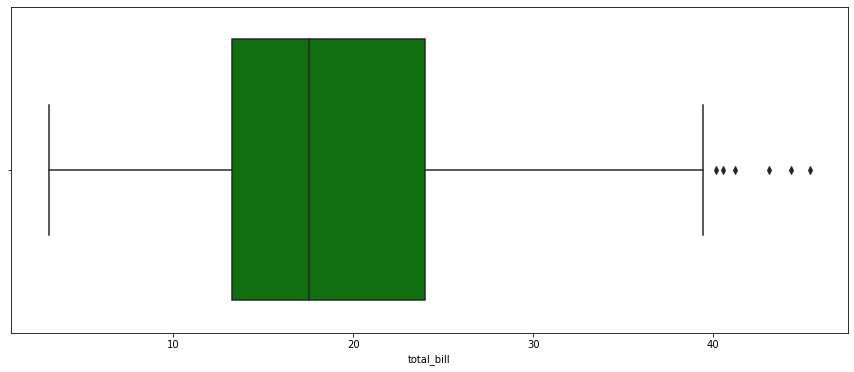

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data['total_bill'],color='green',orient='h')

plt.tight_layout  

#### Handing outlier dengan IQR

In [ ]:
#Bagaimana handling outlier pada kolom total_bill??
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
print('Jumlah baris sebelum handling outlier pada kolom total_bill:', len(data))
Q1 = data['total_bill'].quantile(0.25)
Q3 = data['total_bill'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data['total_bill'] >= low_limit) & (data['total_bill'] <= high_limit))
data = data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(data))
data.head()

Jumlah baris sebelum handling outlier pada kolom total_bill: 244
Jumlah baris setelah memfilter outlier: 235


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
((244 - 235)/244)*100

3.6885245901639343

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

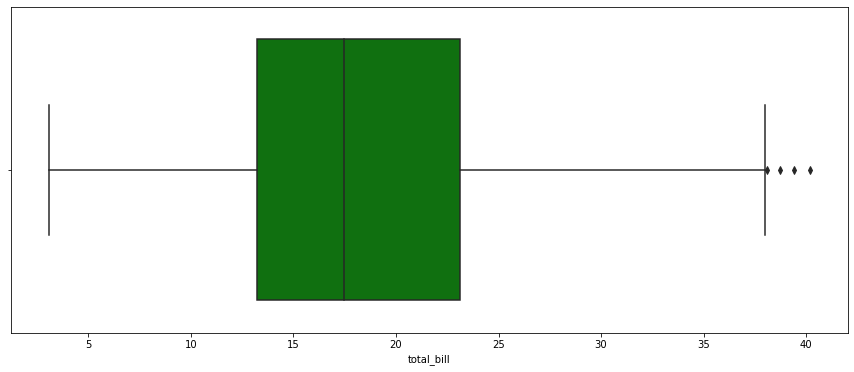

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data['total_bill'],color='green',orient='h')

plt.tight_layout    